# Python Tide Analysis
Tide Analysis for San Diego, San Diego Bay, CA - Station ID: 9410170

SF CO-OPS data is avaiable [here](https://tidesandcurrents.noaa.gov/waterlevels.html?id=9410170)

<img src='https://tidesandcurrents.noaa.gov/images/stationphotos/9410170A.jpg'>

## 讓系統自動安裝ttide潮汐預報套件
自動安裝步驟：
- 使用git clone 指令，將ttid_py套件clone回來
- 切換到ttide_py子目錄
- 執行python setup.py install指令

In [1]:
!git clone https://github.com/moflaher/ttide_py.git
import os
os.chdir('/content/ttide_py/')
!python setup.py install

Cloning into 'ttide_py'...
remote: Enumerating objects: 524, done.
remote: Total 524 (delta 0), reused 0 (delta 0), pack-reused 524
Receiving objects: 100% (524/524), 271.34 KiB | 484.00 KiB/s, done.
Resolving deltas: 100% (331/331), done.
/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:485: UserWarning: The version specified ('0.3_exp') is an invalid version, this may not work as expected with newer versions of setuptools, pip, and PyPI. Please see PEP 440 for more details.
  "details." % self.metadata.version
running install
running bdist_egg
running egg_info
creating ttide.egg-info
writing ttide.egg-info/PKG-INFO
writing dependency_links to ttide.egg-info/dependency_links.txt
writing top-level names to ttide.egg-info/top_level.txt
writing manifest file 'ttide.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'ttide.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating bu

In [11]:
!rm -rf pygeodadj
!git clone https://github.com/geodesy-CNU/pygeodadj.git

Cloning into 'pygeodadj'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 151 (delta 8), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (151/151), 587.05 KiB | 818.00 KiB/s, done.
Resolving deltas: 100% (64/64), done.


## 匯入相關套件
- matplotlib繪圖套件
- pandas資料處理套件
- numpy數值分析/矩陣處理套件
- ttide套件

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ttide.t_tide import t_tide

from pygeodadj.tide.tide_utils import get_const
from pygeodadj.tide.tide_utils import get_datum 
from pygeodadj.tide.tide_utils import plot_obs
from pygeodadj.tide.tide_utils import plot_analysis

## 掛載Google硬碟，讀取資料檔案
- 呼叫Colab.drive套件mount 'My Drive'
- 確認資料在哪一個目錄
- 指定data_dir目錄

In [52]:
# Only required for Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
# make sure where is your data
!ls '/content/drive/My Drive/Colab Notebooks/Labs/Lab8_Tides/Data/'

data_dir='/content/drive/My Drive/Colab Notebooks/Labs/Lab8_Tides/Data/'

CO-OPS__9410170__hr2015.csv  CO-OPS__9413450__hr2015.csv
CO-OPS__9410170__hr2016.csv  CO-OPS__9414290__hr2015.csv
CO-OPS__9410660__hr.csv      CO-OPS__9414290__hr2016.csv


## 讀取潮汐資料
- 指定測站ID
- 賦予測站名稱
- 指定資料年份
- 指定資料開始日期
- 指定資料顯示結束日期
- 給定緯度
- 使用pandas read_csv函數讀取資料

In [14]:
Station_ID   = '9410170'
Station_Name = 'San Diago, CA (9410170)'

obs_year='2015'
start_date = obs_year+'-01-01'
end_date   = obs_year+'-02-01'

Station_Lat=37+48.4/60.0

data_file = data_dir+'CO-OPS__'+Station_ID+'__hr'+obs_year+'.csv'
df = pd.read_csv(data_file, index_col=0, parse_dates=True,header=0)
df.head()

,Water Level,Sigma,I,L
Date Time,,,,
2015-01-01 00:00:00,0.809,0.004,0,0
2015-01-01 01:00:00,1.057,0.008,0,0
2015-01-01 02:00:00,1.234,0.007,0,0
2015-01-01 03:00:00,1.275,0.003,0,0
2015-01-01 04:00:00,1.200,0.006,0,0


## 繪製潮汐資料
呼叫plot_obs函數，繪製觀測資料
- 繪製全年潮汐資料
- 繪製某月份潮汐資料

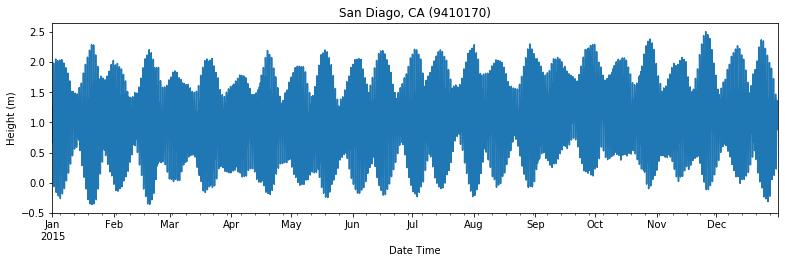

In [15]:
water_level = df[' Water Level'][start_date:]
plot_obs(water_level,Station_Name)

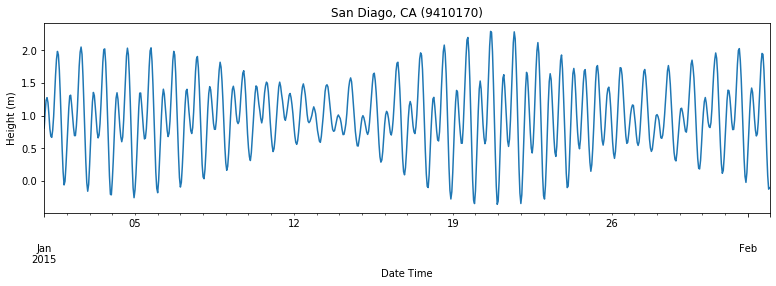

In [16]:
water_level2 = df[' Water Level'][start_date:end_date]
plot_obs(water_level2,Station_Name)

## 使用ttide進行潮信分析

In [17]:
out = t_tide(water_level, dt=1, lat=np.array(Station_Lat))

/usr/local/lib/python3.6/dist-packages/ttide-0.3_exp-py3.6.egg/ttide/t_tide.py:295: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(tc[gd, :], xin[gd])[0].T
/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:161: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real
/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:204: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  return val.imag


-----------------------------------
nobs = 8760 
ngood = 8759 
record length (days) = 365.00
rayleigh criterion = 1.0

Phases at central time
x0= 1.04  xtrend= 0
var(data)= 0.27    var(prediction)= 0.26    var(residual)= 0.01
var(prediction)/var(data) (%) = 96.5

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
  SSA   0.0002282     0.0207     0.032    204.93    105.89      0.41
  MSM   0.0013098     0.0017     0.030    213.86    247.64    0.0031
  MM    0.0015122     0.0023     0.026    260.64    240.58    0.0077
  MSF   0.0028219     0.0097     0.027    324.66    152.97      0.13
  MF    0.0030501     0.0133     0.027    226.38    137.95      0.25
  ALP1  0.0343966     0.0016     0.002    224.43      6.15      0.43
* 2Q1   0.0357064     0.0029     0.001    111.20     42.91       9.8
* SIG1  0.0359087     0.0046     0.002    260.62     16.10       4.3
* Q1    0.0372185     0.0319     0.001    163.58      4.47   

/usr/local/lib/python3.6/dist-packages/ttide-0.3_exp-py3.6.egg/ttide/t_utils.py:447: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  x = np.var(out['xingd'].real, ddof=1)
/usr/local/lib/python3.6/dist-packages/ttide-0.3_exp-py3.6.egg/ttide/t_utils.py:449: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  xr = np.var(out['xresgd'].real, ddof=1)


## 計算潮汐基準面
<hr>

-      MN: 平均潮差
-     MHWI: 平均高潮間隙
-       SR: 平均大潮升
-       NR: 平均小潮升
-     MLAD: 基準面起之平均海面  
-       DL: 平均基準面
-       MR: 平均潮升
-     HHWL: 平均高高潮面

<hr>

In [0]:
datum=get_datum(out)

## 繪製潮汐分析結果
- 包含基準面
- 繪製全年潮汐分析結果
  * 實測資料
  * 分析資料
  * 殘差
- 繪製單月潮汐分析結果
  * 實測資料
  * 分析資料
  * 殘差

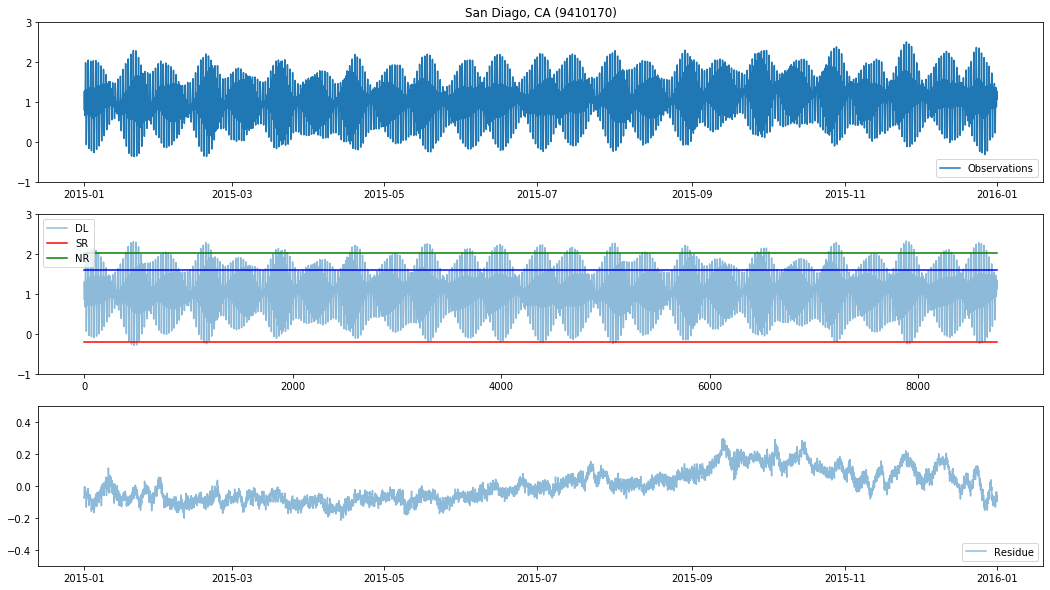

In [19]:
plot_analysis(out,water_level,Station_Name,datum)

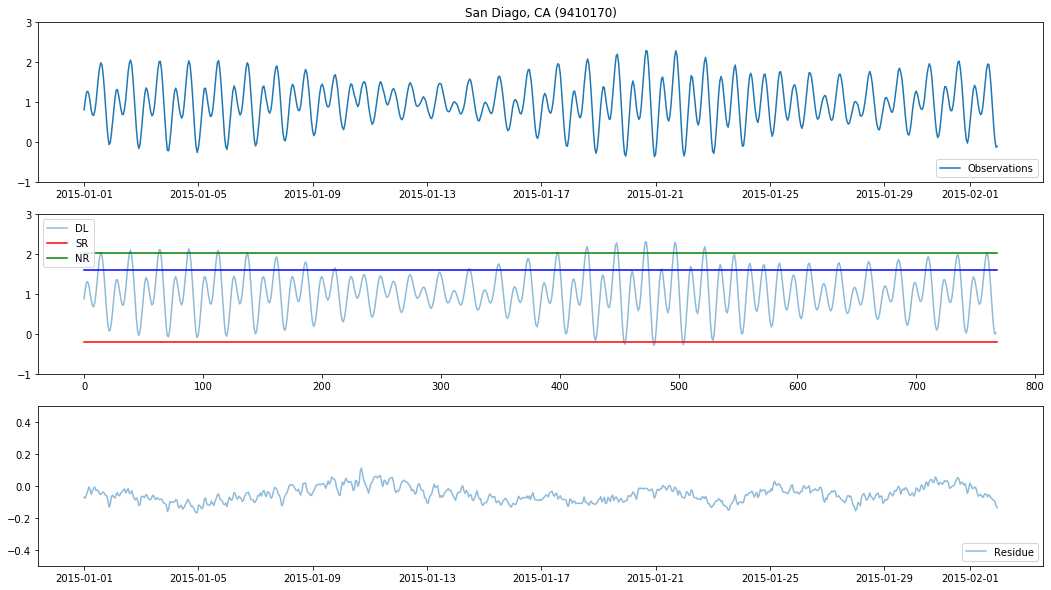

In [20]:
plot_analysis(out,water_level2,Station_Name,datum)

In [21]:
obs_year='2016'
start_date = obs_year+'-01-01'
end_date   = obs_year+'-02-01'

data_file = data_dir+'CO-OPS__'+Station_ID+'__hr'+obs_year+'.csv'
df2 = pd.read_csv(data_file, index_col=0, parse_dates=True,header=0)
df2.head()

,Water Level,Sigma,I,L
Date Time,,,,
2016-01-02 00:00:00,1.004,0.008,0,0
2016-01-02 01:00:00,0.894,0.008,0,0
2016-01-02 02:00:00,0.785,0.007,0,0
2016-01-02 03:00:00,0.653,0.003,0,0
2016-01-02 04:00:00,0.560,0.006,0,0


In [0]:
out.t_predic()

## 以下為保留的程式碼

In [0]:
#
#從ttide預報結果取出天文潮參數(潮名、振福、相位角)
#==============================================
# ttide的輸出變數: out，可用下列指令檢查其dict結構
#
# for key in out: 
#    print(key)

def get_const(out,const_name):
  amp=0.0
  phase=0.0
  freq=0.0

  const_name=const_name.upper()
  if (const_name=='Z0'):
    ast='Z0'
    amp=out['z0']

  else:
    ast_name=out['nameu']
    amp_phase=out['tidecon']
    FQ=out['fu']
    n=len(ast_name)
    for i in range(n):
      ast=str(ast_name[i],'utf-8')
      if (ast.strip()==const_name):
        amp=amp_phase[i][0]
        phase=amp_phase[i][2]
        freq=FQ[i]
        break

  return [ast, amp, phase, freq]

In [0]:
for key in out: 
    print(key)

nobs
ngood
dt
xin
xout
xres
xingd
xoutgd
xresgd
isComplex
ray
nodcor
z0
dz0
fu
nameu
tidecon
snr
synth
lat
ltype


In [0]:
print(out['z0'])
print(out['fu'])
print(out['nameu'])
print(out['tidecon'])

1.0415506117949629
[0.00022816 0.00130978 0.00151215 0.00282193 0.00305009 0.03439657
 0.03570635 0.03590872 0.0372185  0.03742087 0.03873065 0.03895881
 0.04004044 0.04026859 0.04047097 0.04155259 0.04178075 0.04200891
 0.04309053 0.0432929  0.04460268 0.04483084 0.04634299 0.07597495
 0.07617732 0.0774871  0.07768947 0.07899925 0.07920162 0.0805114
 0.08073956 0.08182118 0.08202355 0.08333333 0.08356149 0.08484549
 0.08507364 0.11924206 0.1207671  0.12206399 0.12229215 0.12511408
 0.15951065 0.1610228  0.16233258 0.16384473 0.16407289 0.16666667
 0.16689483 0.20280355 0.20844741 0.24002205 0.2415342  0.24435613
 0.24458429 0.24717807 0.24740623 0.28331495 0.3220456 ]
[b'SSA ' b'MSM ' b'MM  ' b'MSF ' b'MF  ' b'ALP1' b'2Q1 ' b'SIG1' b'Q1  '
 b'RHO1' b'O1  ' b'TAU1' b'BET1' b'NO1 ' b'CHI1' b'P1  ' b'K1  ' b'PHI1'
 b'THE1' b'J1  ' b'SO1 ' b'OO1 ' b'UPS1' b'OQ2 ' b'EPS2' b'2N2 ' b'MU2 '
 b'N2  ' b'NU2 ' b'M2  ' b'MKS2' b'LDA2' b'L2  ' b'S2  ' b'K2  ' b'MSN2'
 b'ETA2' b'MO3 ' b'M3  ' b'SO3

In [0]:
type(xout)

numpy.ndarray

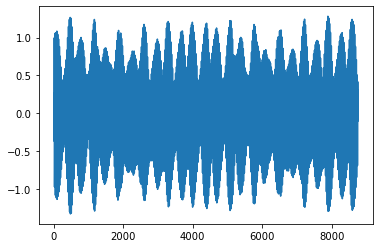

In [0]:
import matplotlib.pyplot as plt

plt.plot(xout)

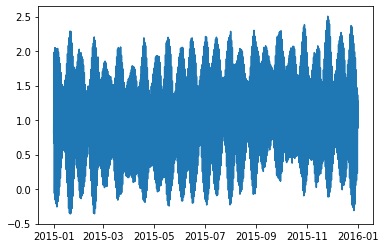

In [23]:
xin=out['xin']
plt.plot(xin)

In [25]:
print(xin.dtype)

float64


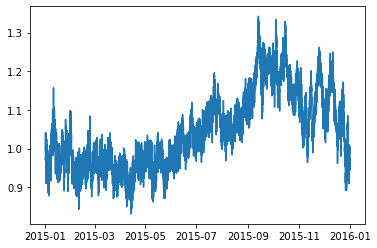

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(res)

In [0]:
!wget https://www.star.nesdis.noaa.gov/sod/lsa/GEBCO_Cookbook/documents/CookBook_20191031.pdf|

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [0]:
!ls

sample_data
